In [4]:
import logging
import warnings

import numpy as np

from exp.options import Noise, Func
from exp.utils.gen_timeseries import gen_timeseries
from st.spacetime import SpaceTime 
import exp.utils.plot_timeseries as stp

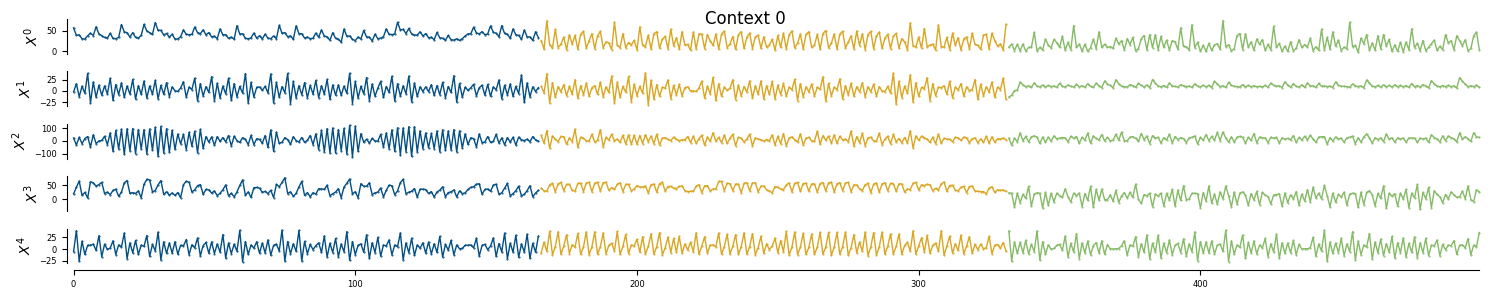

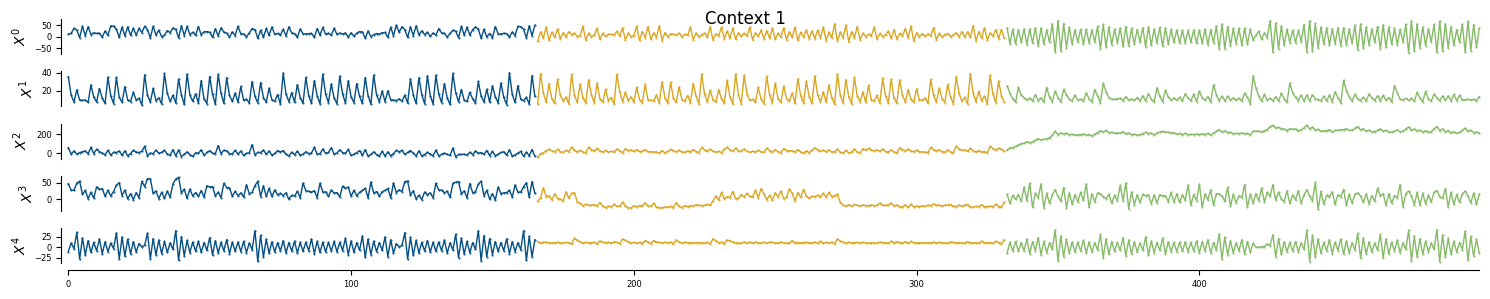

In [5]:
logging.basicConfig()
lg = logging.getLogger("EXAMPLE")
lg.setLevel("INFO")

# DATA PARAMS
true_tau_max = 1
true_min_dur = 30
hat_tau_max = 1
hat_min_dur = 20
seed = 42

np.random.seed(seed)
params = {'C': 2, 'R': 3, 'CPS': 2, 'T': 500, 'D': 1, 'N': 5, 'I': 0.5}
data, truths = gen_timeseries(true_tau_max, true_min_dur, lg=lg, seed=seed, **params)
stp.plot_timeseries_regimes_contexts(data, truths.regimes_partition)


In [6]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    st = SpaceTime(hat_tau_max, hat_min_dur, truths=truths, logger=lg, verbosity=2)
    st.run(data.datasets)



INFO:EXAMPLE:*** SpaceTime (st)***
INFO:EXAMPLE:*** CPS Search ***
INFO:EXAMPLE:	> CPS Result (G*: unknown, initialization: noparents): [(0, 140, 0.0), (140, 188, 1.0), (328, 172, 2.0)]
INFO:EXAMPLE:	> CPS True: [(0, 166, 0), (166, 166, 1), (332, 168, 2)]
INFO:EXAMPLE:	> CPS F1: 0.0 prec: 0.0, recall: 0.0, ari: 0.835, nmi: 0.83 (max. tol. 3)
INFO:EXAMPLE:Interleaving Iteration 1/max. 10*
INFO:EXAMPLE:	Initialise DAG search:  use current regimes [(1, 140), (141, 328), (329, 500)], taumax 1, hybrid False
INFO:EXAMPLE:*** DAG Search ***
INFO:EXAMPLE:Phase 0: Scoring Edge Pairs
INFO:EXAMPLE:Phase 1: Forward
INFO:EXAMPLE:	Adding edge (4, 0) -> 3: s=365.99	[caus-diff-lg]
INFO:EXAMPLE:	Adding edge (4, 0) -> 0: s=180.42	[caus]
INFO:EXAMPLE:	Adding edge (4, 1) -> 2: s=130.5	[caus-diff-lg]
INFO:EXAMPLE:	Adding edge (1, 1) -> 2: s=80.65	[caus]
INFO:EXAMPLE:	Adding edge (1, 0) -> 2: s=42.19	[caus-diff-lg]
INFO:EXAMPLE:	Adding edge (4, 1) -> 3: s=128.08	[caus]
INFO:EXAMPLE:Forward: 112.53s 
INFO:EX

INFO:EXAMPLE:True changepoints: [(3, 66), (69, 132), (135, 200)], found: [(0, 145, 0.0), (145, 23, 1.0), (168, 32, 2.0)]
INFO:EXAMPLE:True partition: [(0, 66, 0), (66, 66, 2), (132, 68, 1)], found: [(0, 145, 0.0), (145, 23, 1.0), (168, 32, 2.0)]


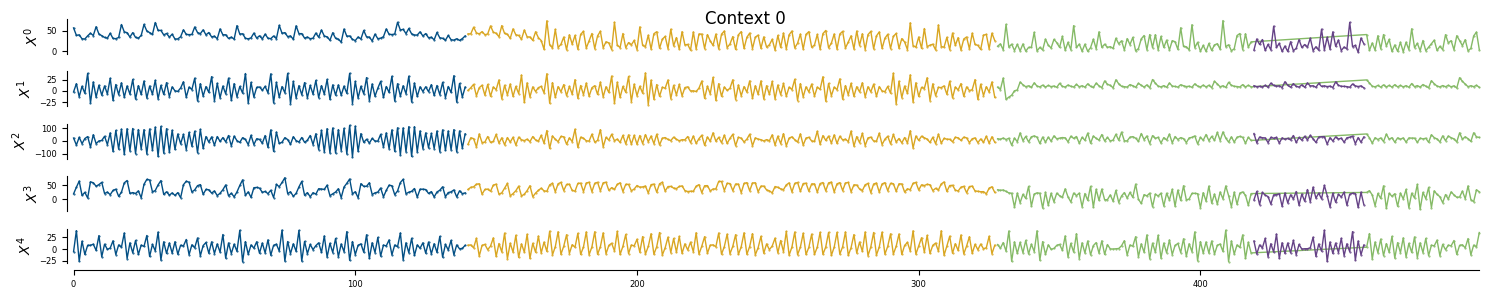

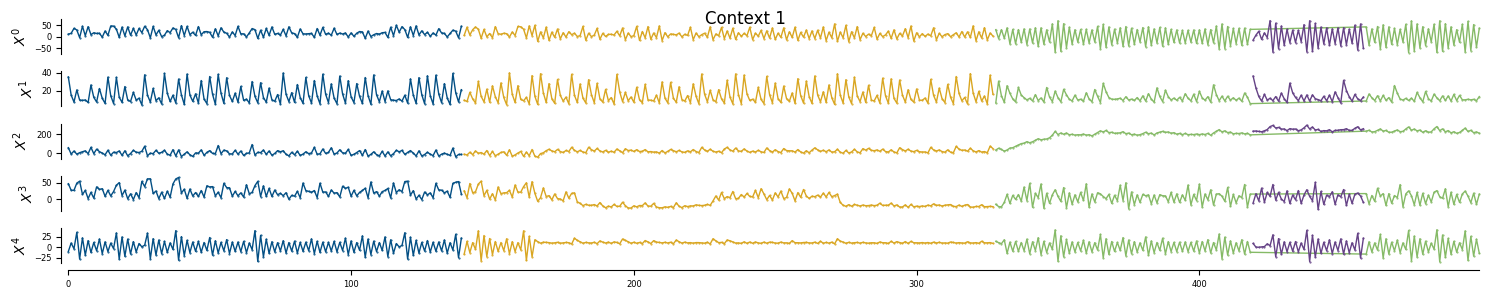

In [10]:
found_regimes = st.result.cur_regimes 
stp.plot_timeseries_regimes_contexts(data, found_regimes)